In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [9]:
data=pd.read_csv('creditcard.csv')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [12]:
import seaborn as sns

<Axes: ylabel='count'>

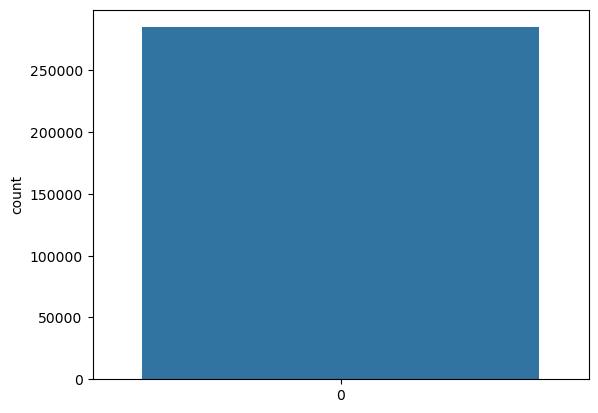

In [13]:
sns.countplot(data['Class'])

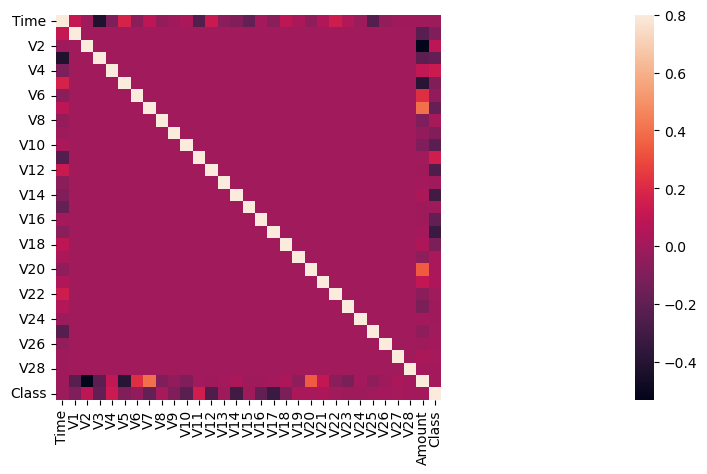

In [65]:
corrmat = data.corr()
fig = plt.figure(figsize = (50, 5))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# UNDER SAMPLING

In [15]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [16]:
normal.shape

(284315, 31)

In [17]:
fraud.shape

(492, 31)

In [20]:
normal_sample=normal.sample(n=492)
normal_sample.shape
                            

(492, 31)

In [21]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [22]:
new_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [23]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# LOGISTIC REGRESSION

In [25]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred1)

0.9086294416243654

In [28]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
precision_score(y_test,y_pred1)

0.9347826086956522

In [31]:
recall_score(y_test,y_pred1)

0.8775510204081632

In [32]:
f1_score(y_test,y_pred1)

0.9052631578947369

# DECISION TREE CLASIFIER

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred2 = dt.predict(X_test)

In [37]:
accuracy_score(y_test,y_pred2)



0.9086294416243654

In [38]:
precision_score(y_test,y_pred2)

0.8921568627450981

In [39]:
recall_score(y_test,y_pred2)

0.9285714285714286

In [40]:
f1_score(y_test,y_pred2)

0.9099999999999999

# RANDOM FOREST CLASSIFIER

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred3 = rf.predict(X_test)
accuracy_score(y_test,y_pred3)

0.934010152284264

In [43]:
precision_score(y_test,y_pred3)

0.9775280898876404

In [44]:
recall_score(y_test,y_pred3)

0.8877551020408163

In [45]:
f1_score(y_test,y_pred3)


0.9304812834224598

In [46]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [47]:
final_data

,Models,ACC
0,LR,90.862944
1,DT,90.862944
2,RF,93.401015


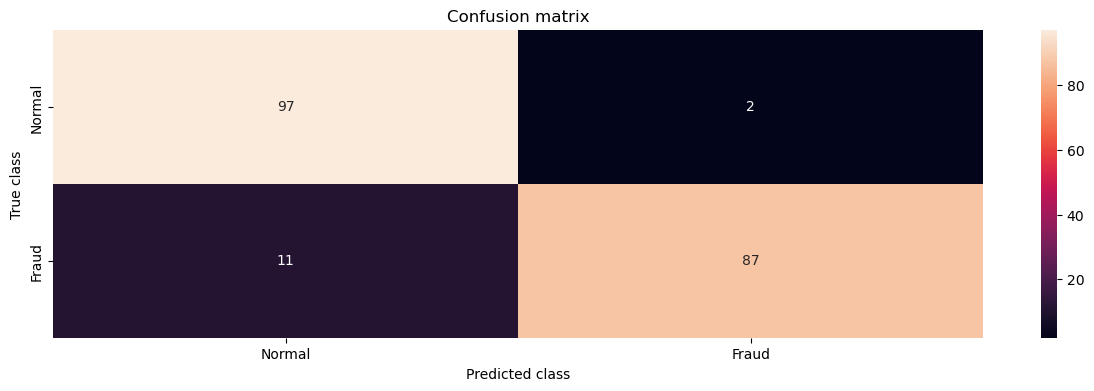

In [73]:
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize =(15, 4))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()